In [5]:
import numpy as np

# exercicio 1

## GERA OS DADOS

mil pra cada classe vetor de treino e teste n = 3000









In [8]:
n = 1000


m_covariancia = np.matrix([[0.8,0.0,0.0],
                           [0.0,0.8,0.0],
                           [0.0,0.0,0.8]])

c1 = np.array([0,0,0])
c2 = np.array([1,2,2])
c3 = np.array([3,3,4])

In [13]:
treinamento1 = np.random.multivariate_normal(c1,m_covariancia,n)
teste1 = np.random.multivariate_normal(c1,m_covariancia,n)
treinamento2 = np.random.multivariate_normal(c2,m_covariancia,n)
teste2 =np.random.multivariate_normal(c2,m_covariancia,n)
treinamento3 = np.random.multivariate_normal(c3,m_covariancia,n)
teste3 = np.random.multivariate_normal(c3,m_covariancia,n)

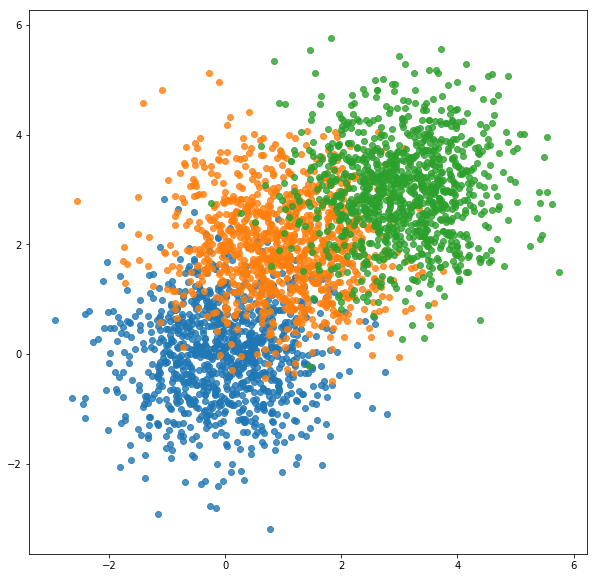

In [15]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
g = [treinamento1,treinamento2,treinamento3]
for i in g:
    plt.scatter(i[:,0],i[:,1],alpha=0.8)

In [27]:
mean1 = np.mean(treinamento1, axis=0)
mean2 = np.mean(treinamento2, axis=0)
mean3 = np.mean(treinamento3, axis=0)

## a)

In [29]:
print(mean1,mean2,mean3)

[-0.01472806 -0.01589936 -0.01125892] [0.97671554 1.98046858 2.00568812] [3.03082297 2.96613427 4.04332428]


In [41]:
cov1 = np.cov(treinamento1,rowvar=False)
cov2 = np.cov(treinamento2,rowvar=False)
cov3 = np.cov(treinamento3,rowvar=False)

cov_final = (cov1+cov2+cov3)/3

In [42]:
cov_final

array([[ 0.84383969, -0.00985262, -0.01250323],
       [-0.00985262,  0.8079127 , -0.00780431],
       [-0.01250323, -0.00780431,  0.81968923]])

## b)

In [47]:
teste = np.concatenate([teste1,teste2,teste3])
teste.shape

(3000, 3)

In [60]:
esperado = np.concatenate([np.full(1000,1),np.full(1000,2),np.full(1000,3)])
esperado.shape

(3000,)

In [52]:
from scipy.spatial import distance

def distancia_euclidiana_classificador(amostra):
    dist1 = distance.euclidean(amostra, mean1)
    dist2 = distance.euclidean(amostra, mean2)
    dist3 = distance.euclidean(amostra, mean3)
    if(dist1<dist2 and dist1<dist3):return 1
    elif(dist2<dist1 and dist2<dist3):return 2
    else: return 3


In [61]:
g=[]
for i in teste:
      g.append(distancia_euclidiana_classificador(i))


In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(esperado, g)

0.9363333333333334

## c) 

In [112]:
from scipy.spatial import distance
from numpy.linalg import inv

def distancia_mahalanobis_classificador(amostra):
    iv = inv(cov_final)
    dist1 = distance.mahalanobis(amostra, mean1,iv)
    dist2 = distance.mahalanobis(amostra, mean2,iv)
    dist3 = distance.mahalanobis(amostra, mean3,iv)
    if(dist1<dist2 and dist1<dist3):return 1
    elif(dist2<dist1 and dist2<dist3):return 2
    else: return 3

In [76]:
g2=[]
for i in teste:
      g2.append(distancia_mahalanobis_classificador(i))

In [79]:
accuracy_score(esperado, g2)

0.9366666666666666

## d)

In [92]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

treinamento = np.concatenate([treinamento1,treinamento2,treinamento3])


gnb.fit(treinamento,esperado)

GaussianNB(priors=None)

In [94]:
accuracy_score(esperado, gnb.predict(teste))

0.9363333333333334

código disponivel em https://github.com/lopeLH/Gaussian-Bayes-classifier/blob/master/Gaussian%20Bayes%20classifier.ipynb apresentava um erro na chamada de classe, que levava a slices vazios. 

Pelo fato da matriz de covariancia dos dados ser diagonal na forma original foi implementado o uso do naive bayes já disponível em biblioteca

## e)

Acurácia:

    euclides: 0.9363333333333334
    
    Mahalanobis: 0.9366666666666666
    
    bayes: 0.9363333333333334
    
os desempenhos são semelhantes nas abordagens de distância, pois como a matriz de covariancia é diagonal, a distância de Mahalanobis e de euclides se comportam de maneira semelhante, não havendo distorções em alguma dimensão.

O classificador de bayes tambem parte do mesmo principio tendo os dados a mesma matriz de covariancia.

## 2) a)

In [103]:
m1 =  np.random.multivariate_normal([1,1],np.identity(2)*0.1,400)
m2 =  np.random.multivariate_normal([3,3],np.identity(2)*0.2,400)
m3 =  np.random.multivariate_normal([2,6],np.identity(2)*0.3,200)
m = np.concatenate([m1,m2,m3])

In [104]:
m

array([[0.84235939, 0.9272734 ],
       [1.04445218, 0.77040063],
       [1.16641278, 0.64098514],
       ...,
       [2.07996163, 6.1271619 ],
       [1.76761737, 5.26589691],
       [2.48804888, 5.75126246]])

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

clf = mixture.GaussianMixture(n_components=3, covariance_type='full',means_init=[[0,2],[5,2],[2,5]],
    precisions_init = [inv((0.15*np.identity(2))),
                       inv((0.27*np.identity(2))),
                       inv((0.4*np.identity(2)))],
                             weights_init = [0.4,0.4,0.2])

In [120]:
clf.fit(m)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=array([[0., 2.],
       [5., 2.],
       [2., 5.]]),
        n_components=3, n_init=1,
        precisions_init=array([[[6.66667, 0.     ],
        [0.     , 6.66667]],

       [[3.7037 , 0.     ],
        [0.     , 3.7037 ]],

       [[2.5    , 0.     ],
        [0.     , 2.5    ]]]),
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False,
        weights_init=array([0.4, 0.4, 0.2]))

In [121]:
clf.means_

array([[1.00457874, 1.01475204],
       [3.01581426, 3.01137805],
       [1.99041842, 6.04061582]])

In [122]:
clf.covariances_

array([[[ 0.08834039,  0.00216578],
        [ 0.00216578,  0.09909952]],

       [[ 0.19537441, -0.0009376 ],
        [-0.0009376 ,  0.19527409]],

       [[ 0.27789507, -0.00361815],
        [-0.00361815,  0.26690805]]])

## b)

In [123]:
clf2 = mixture.GaussianMixture(n_components=3, covariance_type='full',means_init=[[0,8],[5,8],[1,3]],
    precisions_init = [inv((0.3*np.identity(2))),
                       inv((0.6*np.identity(2))),
                       inv((0.8*np.identity(2)))])


clf2.fit(m)
print(clf2.means_)
print(clf2.covariances_)

[[1.54307175 6.12457377]
 [2.28998219 5.98383635]
 [2.01011268 2.0129051 ]]
[[[0.15271135 0.04070793]
  [0.04070793 0.26027895]]

 [[0.13815926 0.00837515]
  [0.00837515 0.26439661]]

 [[1.15314834 1.00449771]
  [1.00449771 1.14360843]]]


os valores para starts aleatórios parecem se diversificar primariamente pela distância dos valores originais. Os starts fixos originais são mais próximos dos reais que os starts aleatórios, levando a uma convergência mais fácil.

Nos starts modificados, a distância das distribuições imputadas das procuradas, somada a um grupo com número de amostras menor leva a uma aproximação mais demorada.

## 3)a)

In [142]:
import numpy as np
import math 

def funcao_p(x):
    return 1/3 * (1/math.sqrt(2*math.pi*0.2))*math.exp(-(x**2/2*0.2)) +2/3*(1/math.sqrt(2*math.pi*0.2))*math.exp(-((x-2)**2)/2*0.2)

p = np.vectorize(funcao_p)

def randomvariate(pdf,n=1000,xmin=-10,xmax=15):  
    import numpy 

    """  
    Rejection method for random number generation  
    ===============================================  
    Uses the rejection method for generating random numbers derived from an arbitrary   
    probability distribution. For reference, see Bevington's book, page 84. Based on  
    rejection*.py.  

    Usage:  
    >>> randomvariate(P,N,xmin,xmax)  
    where  
    P : probability distribution function from which you want to generate random numbers  
    N : desired number of random values  
    xmin,xmax : range of random numbers desired  

    Returns:   
    the sequence (ran,ntrials) where  
    ran : array of shape N with the random variates that follow the input P  
    ntrials : number of trials the code needed to achieve N  

    Here is the algorithm:  
    - generate x' in the desired range  
    - generate y' between Pmin and Pmax (Pmax is the maximal value of your pdf)  
    - if y'<P(x') accept x', otherwise reject  
    - repeat until desired number is achieved  

    Rodrigo Nemmen  
    Nov. 2011  
    """  
    # Calculates the minimal and maximum values of the PDF in the desired  
    # interval. The rejection method needs these values in order to work  
    # properly.  
    x=numpy.linspace(xmin,xmax,1000)  
    y=pdf(x)
    pmin=0.  
    pmax=y.max()  

    # Counters  
    naccept=0  
    ntrial=0  

    # Keeps generating numbers until we achieve the desired n  
    ran=[] # output list of random numbers  
    while naccept<n:  
        x=numpy.random.uniform(xmin,xmax) # x'  
        y=numpy.random.uniform(pmin,pmax) # y'  

        if y<pdf(x):  
            ran.append(x)  
            naccept=naccept+1  
            ntrial=ntrial+1  

    ran=numpy.asarray(ran)  

    return ran,ntrial  




In [147]:
dados = randomvariate(p, n=500)

dados[0]

array([-1.59507687e+00,  1.71460178e+00, -9.58172542e-01, -1.58917908e+00,
        2.25099350e-01, -1.45922309e+00,  4.17677682e-01,  7.85092641e-01,
        2.12371538e+00,  8.65047849e-01,  2.39305742e+00,  3.78932844e+00,
        4.04793473e+00,  2.25008870e+00, -4.56164858e+00,  1.62200100e+00,
        3.23302756e+00, -4.36892512e-01,  3.29695551e+00,  1.04869487e+00,
        1.17420421e+00,  1.58101094e+00,  3.37735428e+00,  3.32839117e+00,
       -1.19526116e+00, -4.02736522e+00, -1.09491500e+00, -8.10486651e-01,
        6.05456009e-01,  5.01322856e+00,  5.39179529e+00,  5.67266031e+00,
       -4.26371878e+00, -2.75173615e-01,  1.10754156e+00,  2.01569287e+00,
        2.67438895e+00,  1.19879292e+00,  4.56052102e-01,  1.34523218e+00,
        6.02826082e-01, -3.21622968e-01,  3.75846044e+00,  2.82437123e-01,
        1.40573110e+00,  2.15224344e+00,  4.04565605e+00,  3.74721580e-01,
        4.77058751e+00,  2.82595778e+00,  1.39936335e+00,  4.35868707e+00,
        3.33876768e+00,  

In [151]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np

kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(dados[0].reshape(-1, 1))
kde.score_samples(dados[0].reshape(-1, 1))


array([-2.53126547, -2.53490202, -2.14808679, -2.5334463 , -1.54858609,
       -1.99777935, -2.00493973, -1.74081784, -2.11790644, -1.85911539,
       -1.79531545, -2.01582518, -2.41593387, -1.99545665, -3.45421394,
       -1.98482646, -1.75018396, -2.16010716, -1.49662341, -1.85245139,
       -1.834937  , -1.88810698, -1.72443088, -1.52486919, -2.03075045,
       -3.55933669, -2.43725617, -2.12289855, -1.97232116, -3.90211603,
       -3.13040302, -3.19872043, -3.30310888, -2.31025272, -1.93647304,
       -2.87060613, -1.77269456, -1.84879843, -1.92549006, -1.64806143,
       -1.96998018, -2.27813302, -1.85399042, -1.83516432, -1.34738252,
       -2.06938248, -2.42544362, -2.17745945, -2.30118158, -2.03618136,
       -1.34829491, -2.21188366, -1.5523479 , -1.83249515, -2.63764222,
       -3.05628562, -2.21899141, -2.00588018, -2.0172887 , -3.10844038,
       -2.57214555, -1.91625857, -2.13515649, -1.92679618, -1.84362781,
       -3.24470035, -2.5020538 , -2.86880153, -2.11116963, -2.00

In [89]:
#Actual algorithm implementation.


from sklearn.datasets import make_blobs, make_moons, make_regression, load_iris
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np

class BayesClassifier:
    
    mu = None
    cov = None
    n_classes = None
    
    def __init__(self):
        a = None
    
    def pred(self,x):
        prob_vect = np.zeros(self.n_classes)
        
        for i in range(self.n_classes):
            
            
            mnormal = multivariate_normal(mean=bc.mu[i], cov=bc.cov[i])
            
            # We use uniform priors
            prior = 1./self.n_classes
            
            prob_vect[i] = prior*mnormal.pdf(x)
            sumatory = 0.
            for j in range(self.n_classes):
                mnormal = multivariate_normal(mean=bc.mu[j], cov=bc.cov[j])
                sumatory += prior*mnormal.pdf(x)
            prob_vect[i] = prob_vect[i]/sumatory
        return prob_vect
        
    def fit(self, X,y):
        self.mu = []
        self.cov = []
        
        self.n_classes = np.max(y)+1
        
        for i in range(self.n_classes):
            Xc = X[y==i]
            
            mu_c = np.mean(Xc, axis=0)
            self.mu.append(mu_c)
            
            cov_c = np.zeros((X.shape[1], X.shape[1]))
            for j in range( Xc.shape[0]):
                a = Xc[j].reshape((X.shape[1],1))
                b = Xc[j].reshape((1,X.shape[1]))
                cov_ci = np.multiply(a, b)
                cov_c = cov_c+cov_ci
            cov_c = cov_c/float(X.shape[0])
            self.cov.append(cov_c)
        self.mu = np.asarray(self.mu)
        self.cov = np.asarray(self.cov)

In [132]:
import scipy.stats as st
import math 
class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        return1/3 * (1/math.sqrt(2*math.pi*0.2))*math.exp(-(x**2/2*0.2)) +2/3*(1/math.sqrt(2*math.pi*0.2))*math.exp(-((x-2)**2)/2*0.2)

my_cv = my_pdf(a=0, b=1, name='my_pdf')